Цыварев Илья, гр. ИСТ-112м
Вариант 1
Число нейронов в скрытом слое n_hidden_neurons = 20
Шаг градиентного спуска lr = 0.001

In [1]:
import torch 
import matplotlib.pyplot as plt
import pandoc

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

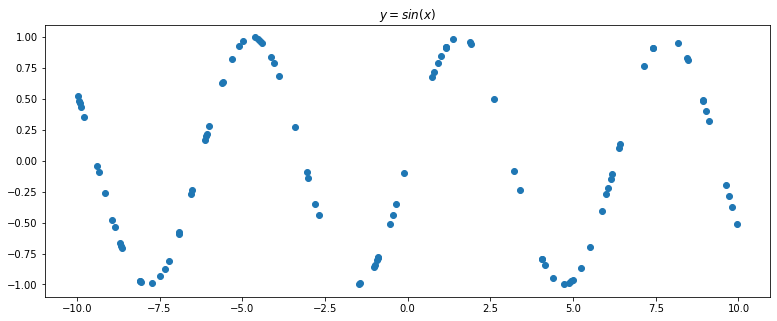

In [3]:
def  target_function(x):
       return 2**x * torch.sin(2**-x)
    
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(x_train)
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

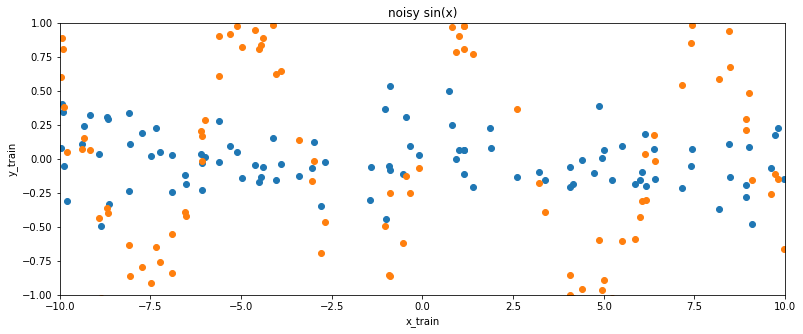

In [4]:
noise = torch.randn(y_train.shape) / 5.
plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [5]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

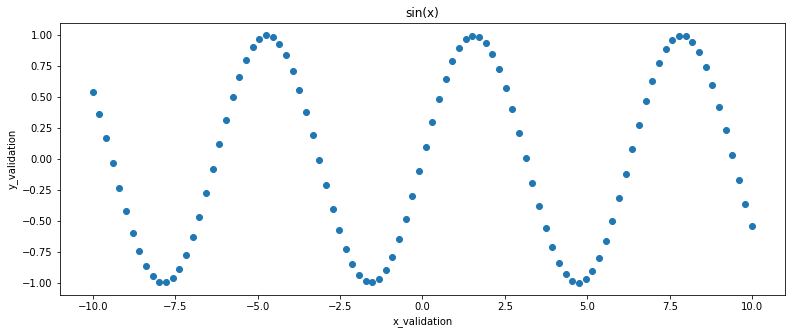

In [6]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [7]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(20)

Создали нейронную сеть с заданным количеством нейронов на скрытом слое (20)

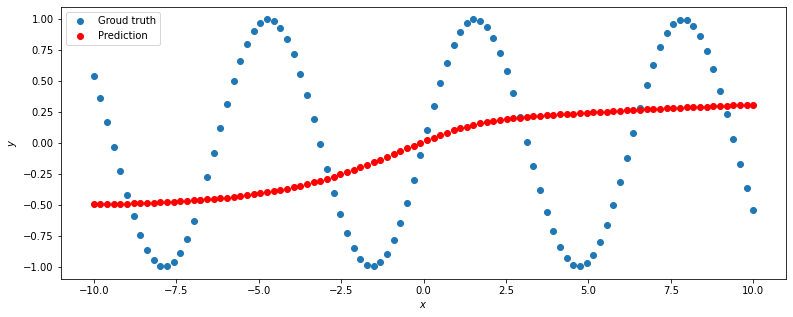

In [8]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

In [9]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

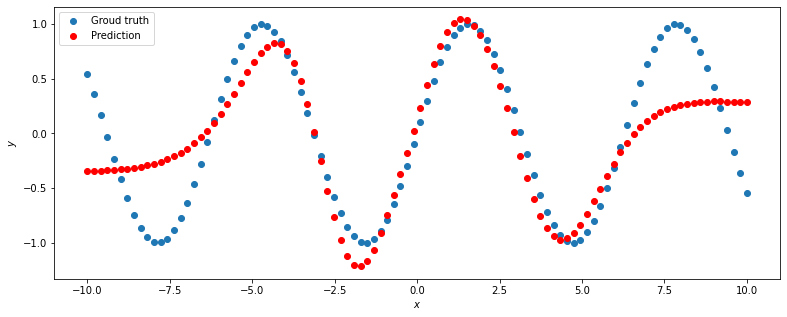

In [10]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.002)
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

Наилучшим значением шага градиентного спуска является lr = 0.002

In [11]:
def metric(pred, target):
        return (pred - target).abs().mean()

In [12]:
def  target_function(x):
       return 2**x * torch.sin(2**-x)

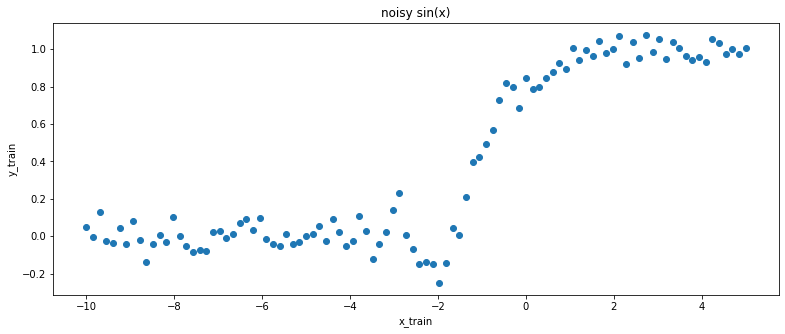

In [13]:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

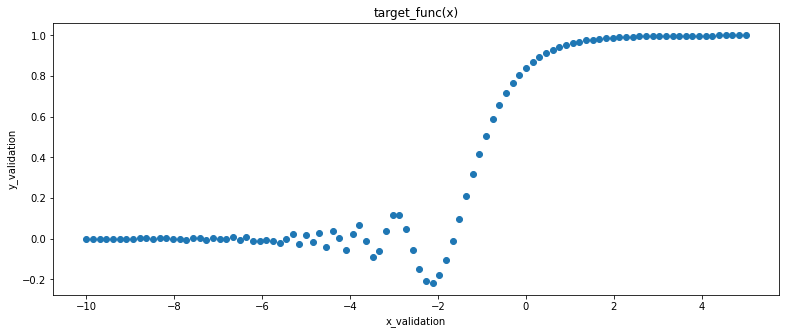

In [14]:
x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('target_func(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

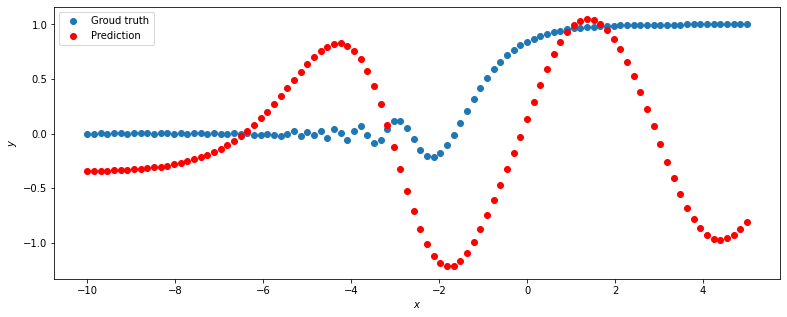

In [15]:
predict(sine_net, x_validation, y_validation)

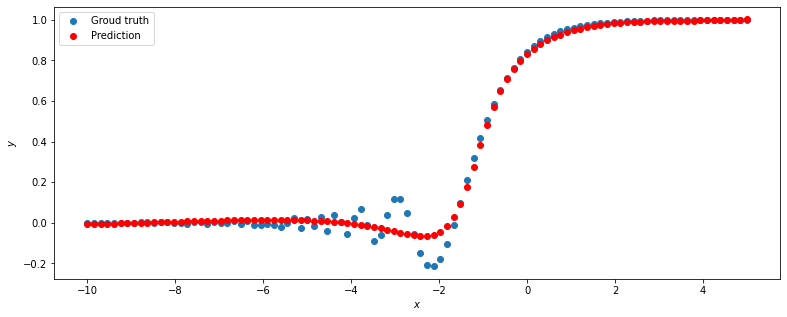

In [16]:
sine_net = SineNet(20)
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.002)
for epoch_index in range(3000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

In [17]:
print(metric(sine_net.forward(x_validation), y_validation).item())

0.02302737720310688


Оптимальное значение метрики МАЕ было получено при увеличении количества эпох с 2000 до 3000 и при увеличении шага градиентного спуска lr с 0.001 до 0.002
Число нейронов в скрытом слое нейросети и архитектура сети остались неизменёнными.